<a href="https://colab.research.google.com/github/marastika/algoritma_linear-programming/blob/main/Algortima_linear_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 39.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Koefisien dari fungsi objektif
c = [3200, 15000]

# Koefisien dari batasan (Ax <= b)
# Dalam hal ini, kita akan mempertimbangkan dua batasan utama:
# 1. Kapur: 10.000 <= x1 <= 540.000
# 2. Soda Kaustik: 0 <= x2 <= 100.000

A = [
    [-1, 0],  # untuk x1 >= 10.000
    [1, 0],   # untuk x1 <= 540.000
    [0, -1],  # untuk x2 >= 0
    [0, 1]    # untuk x2 <= 100.000
]

b = [
    -10000,   # untuk x1 >= 10.000
    540000,   # untuk x1 <= 540.000
    0,        # untuk x2 >= 0
    100000    # untuk x2 <= 100.000
]

# Batasan untuk variabel (x1, x2) >= 0 sudah tercakup dalam bentuk standar linprog

# Menyelesaikan masalah linear programming menggunakan metode Simplex
res = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Menampilkan hasil
print('Status:', res.message)
print('Nilai optimal dari fungsi objektif:', res.fun)
print('Nilai variabel keputusan:')
print('x1 (Kapur):', res.x[0], 'kg')
print('x2 (Soda Kaustik):', res.x[1], 'kg')


Status: The solution was determined in presolve as there are no non-trivial constraints.
Nilai optimal dari fungsi objektif: 32000000.0
Nilai variabel keputusan:
x1 (Kapur): 10000.0 kg
x2 (Soda Kaustik): 0.0 kg


<ipython-input-1-6d46c6a9aac9>:29: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='simplex')


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Definisi koefisien fungsi objektif (minimasi biaya)
c = [3200, 15000]

# Definisi koefisien batasan (Ax <= b)
# Menambahkan variabel slack untuk mengubah ketidaksetaraan menjadi kesetaraan
A = [
    [1, 0],  # x1 >= 10.000
    [-1, 0],  # x1 <= 540.000
    [0, 1],  # x2 <= 100.000
    [0, -1]  # x2 >= 0
]

b = [
    10000,   # x1 >= 10.000
    -540000,  # x1 <= 540.000
    100000,  # x2 <= 100.000
    0        # x2 >= 0
]

# Menyelesaikan masalah linear programming menggunakan metode Simplex
res = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Menampilkan hasil
print('Status:', res.message)
print('Nilai optimal dari fungsi objektif:', res.fun)
print('Nilai variabel keputusan:')
print('x1 (Kapur):', res.x[0], 'kg')
print('x2 (Soda Kaustik):', res.x[1], 'kg')


Status: The problem is (trivially) infeasible because a singleton row in the upper bound constraints is inconsistent with the bounds.
Nilai optimal dari fungsi objektif: 0.0
Nilai variabel keputusan:
x1 (Kapur): 0.0 kg
x2 (Soda Kaustik): 0.0 kg


<ipython-input-2-4ce108dcfc80>:24: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub=A, b_ub=b, method='simplex')


In [ ]:
import numpy as np
from scipy.optimize import linprog

# Coefficients of the objective function
c = [3200, 15000]  # Cost coefficients for Kapur (C1) and Soda Kaustik (C2)

# Coefficients of the inequality constraints
# A * x <= b
A = [
    [-1, 0],  # -x1 <= -10000 (x1 >= 10000)
    [1, 0],   # x1 <= 540000
    [0, -1],  # -x2 <= 0 (x2 >= 0)
    [0, 1]    # x2 <= 100000
]

b = [
    -10000,  # x1 >= 10000
    540000,  # x1 <= 540000
    0,       # x2 >= 0
    100000   # x2 <= 100000
]

# Solve the linear programming problem using the simplex method
result = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Output the results
print('Status:', result.message)
print('Optimal value (minimum cost):', result.fun)
print('Optimal values of the variables:')
print('x1 (Kapur):', result.x[0], 'kg')
print('x2 (Soda Kaustik):', result.x[1], 'kg')


Status: The solution was determined in presolve as there are no non-trivial constraints.
Optimal value (minimum cost): 32000000.0
Optimal values of the variables:
x1 (Kapur): 10000.0 kg
x2 (Soda Kaustik): 0.0 kg


<ipython-input-1-3bd2f1825ec8>:24: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, method='simplex')


In [ ]:
pip install matplotlib

<ipython-input-5-cc1b0cb5b4d1>:27: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  result = linprog(c, A_ub=A, b_ub=b, method='simplex')


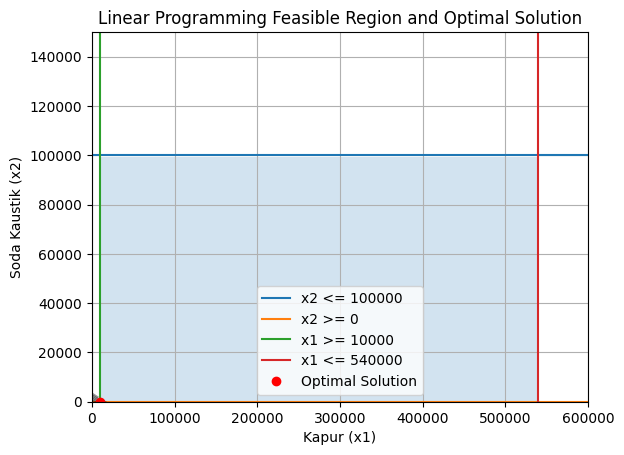

Optimal value (minimum cost): 32000000.0
Optimal values of the variables: x1 (Kapur) = 10000.0 kg, x2 (Soda Kaustik) = 0.0 kg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Definisikan koefisien dari fungsi objektif (minimasi biaya)
c = [3200, 15000]  # Biaya per kg Kapur dan Soda Kaustik

# Definisikan koefisien dari batasan (Ax <= b)
# Dalam hal ini, kita akan mempertimbangkan batasan utama:
# 1. Kapur: 10.000 <= x1 <= 540.000
# 2. Soda Kaustik: 0 <= x2 <= 100.000
A = [
    [-1, 0],  # -x1 <= -10.000 (x1 >= 10.000)
    [1, 0],   # x1 <= 540.000
    [0, 1],   # x2 <= 100.000
    [0, -1]   # -x2 <= 0 (x2 >= 0)
]

b = [
    -10000,  # x1 >= 10.000
    540000,  # x1 <= 540.000
    100000,  # x2 <= 100.000
    0        # x2 >= 0
]

# Selesaikan masalah linear programming menggunakan metode Simplex
result = linprog(c, A_ub=A, b_ub=b, method='simplex')

# Ekstrak solusi optimal
x1_opt, x2_opt = result.x

# Plotting
x = np.linspace(0, 600000, 400)

# Plotkan batasan
plt.plot(x, np.full_like(x, 100000), label='x2 <= 100000')
plt.plot(x, np.full_like(x, 0), label='x2 >= 0')
plt.plot(np.full_like(x, 10000), x, label='x1 >= 10000')
plt.plot(np.full_like(x, 540000), x, label='x1 <= 540000')

# Isi daerah layak
plt.fill_betweenx(x, 10000, 540000, alpha=0.2, where=(x <= 100000))

# Garis fungsi objektif (untuk ilustrasi, menunjukkan beberapa garis untuk memvisualisasikan arah)
for Z in [1e7, 2e7, 3e7, 4e7, 5e7]:
    plt.plot(x, (Z - 3200 * x) / 15000, 'k--', alpha=0.4)

# Plotkan solusi optimal
plt.plot(x1_opt, x2_opt, 'ro', label='Optimal Solution')

# Anotasi
plt.xlabel('Kapur (x1)')
plt.ylabel('Soda Kaustik (x2)')
plt.title('Linear Programming Feasible Region and Optimal Solution')
plt.legend()
plt.grid(True)
plt.xlim(0, 600000)
plt.ylim(0, 150000)

# Tampilkan plot
plt.show()

print(f'Optimal value (minimum cost): {result.fun}')
print(f'Optimal values of the variables: x1 (Kapur) = {x1_opt} kg, x2 (Soda Kaustik) = {x2_opt} kg')


In [ ]:
kesimpulan kurva daitas